In [ ]:
!pip install GEOparse gseapy scanpy seaborn plotly pandas numpy matplotlib scipy statsmodels


  Using cached GEOparse-2.0.4-py3-none-any.whl.metadata (6.5 kB)
  Using cached gseapy-1.1.11-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.3/605.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 99.2 MB/s eta 0:00:00


In [ ]:
import GEOparse
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gseapy as gp
from scipy import stats

from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn-v0_8')

print("Setup complete! Ready for GSE19188 analysis.")

Setup complete! Ready for GSE19188 analysis.


In [ ]:
import GEOparse
import pandas as pd

gse = GEOparse.get_GEO("GSE19188", destdir="./")

# Building expression matrix: rows = probes, columns = samples
samples = gse.gsms  # dict of GSM objects
expr_df = pd.DataFrame(
    {gsm_name: gsm.table['VALUE'].values for gsm_name, gsm in samples.items()}
)
expr_df.index = list(next(iter(samples.values())).table['ID_REF'])

print("Expression matrix:", expr_df.shape)  # (probes x samples)


30-Nov-2025 12:53:49 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
30-Nov-2025 12:53:49 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
30-Nov-2025 12:53:49 INFO GEOparse - Parsing ./GSE19188_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE19188_family.soft.gz: 
30-Nov-2025 12:53:49 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
30-Nov-2025 12:53:49 DEBUG GEOparse - SERIES: GSE19188
DEBUG:GEOparse:SERIES: GSE19188
30-Nov-2025 12:53:49 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.12/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
30-Nov-2025 12:53:51 DEBUG GEOparse - SAMPLE: GSM475656
DEBUG:GEOparse:SAMPLE: GSM475656
30-Nov-2025 12:53:51 DEBUG GEOparse 

Expression matrix: (54675, 156)


In [ ]:
pheno = pd.DataFrame({
    gsm_name: gsm.metadata['source_name_ch1']
    for gsm_name, gsm in samples.items()
}).T
pheno.columns = ['source_name_ch1']

print(pheno['source_name_ch1'].value_counts())


source_name_ch1
frozen tissue    156
Name: count, dtype: int64


In [ ]:
# Log2 transform
expr_clipped=expr.clip(lower=0)
expr_log=np.log2(expr_clipped+1)

# Split groups
tumor_ids = pheno.index[pheno['source'].str.contains('adenocarcinoma', case=False)]
normal_ids = pheno.index[pheno['source'].str.contains('normal', case=False)]

tumor_expr = expr_log[tumor_ids]
normal_expr = expr_log[normal_ids]

In [ ]:
print(pheno.columns)
print(pheno.head())


Index(['source'], dtype='object')
                  source
GSM475656  frozen tissue
GSM475657  frozen tissue
GSM475658  frozen tissue
GSM475659  frozen tissue
GSM475660  frozen tissue


In [ ]:
import GEOparse
import pandas as pd
import numpy as np

gse = GEOparse.get_GEO("GSE19188", destdir="./")

# Expression matrix: rows = probes, columns = samples
expr_df = pd.DataFrame(
    {gsm_name: gsm.table.set_index('ID_REF')['VALUE'] for gsm_name, gsm in gse.gsms.items()}
)
expr_df.index.name = 'probe_id'

# Phenotype: get more informative about the fields than just "frozen tissue"
pheno = pd.DataFrame({
    gsm_name: {
        'title': gsm.metadata.get('title', [''])[0],
        'source': gsm.metadata.get('source_name_ch1', [''])[0],
        'characteristics': '; '.join(gsm.metadata.get('characteristics_ch1', []))
    }
    for gsm_name, gsm in gse.gsms.items()
}).T

30-Nov-2025 13:56:56 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
30-Nov-2025 13:56:56 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
30-Nov-2025 13:56:56 INFO GEOparse - Parsing ./GSE19188_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE19188_family.soft.gz: 
30-Nov-2025 13:56:57 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
30-Nov-2025 13:56:57 DEBUG GEOparse - SERIES: GSE19188
DEBUG:GEOparse:SERIES: GSE19188
30-Nov-2025 13:56:57 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.12/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
30-Nov-2025 13:57:00 DEBUG GEOparse - SAMPLE: GSM475656
DEBUG:GEOparse:SAMPLE: GSM475656
30-Nov-2025 13:57:00 DEBUG GEOparse 

In [ ]:
print(pheno.head())
print(pheno['title'].unique()[:10])
print(pheno['characteristics'].unique()[:10])


                        title         source  \
GSM475656  NSCLC EMC TB0069tu  frozen tissue   
GSM475657     NSCLC EMC 2333N  frozen tissue   
GSM475658     NSCLC EMC 2335N  frozen tissue   
GSM475659     NSCLC EMC 2344T  frozen tissue   
GSM475660     NSCLC EMC 2381N  frozen tissue   

                                             characteristics  
GSM475656  tissue type: tumor; cell type: LCC; overall su...  
GSM475657  tissue type: healthy; cell type: healthy; over...  
GSM475658  tissue type: healthy; cell type: healthy; over...  
GSM475659  tissue type: healthy; cell type: healthy; over...  
GSM475660  tissue type: healthy; cell type: healthy; over...  
['NSCLC EMC TB0069tu' 'NSCLC EMC 2333N' 'NSCLC EMC 2335N'
 'NSCLC EMC 2344T' 'NSCLC EMC 2381N' 'NSCLC EMC 2382T' 'NSCLC EMC 2384T'
 'NSCLC EMC 2387N' 'NSCLC EMC 2388T' 'NSCLC EMC 2393N']
['tissue type: tumor; cell type: LCC; overall survival: 12.5; status: deceased; gender: M'
 'tissue type: healthy; cell type: healthy; overall sur

In [ ]:
# expr_df: probes x samples (from GEOparse)
expr = expr_df

# Check variance distribution
expr_var = expr.var(axis=1)
print(expr_var.describe())

# Use a much smaller cutoff, or keep all genes first
cutoff = 1.0
expr_filtered = expr.loc[expr_var > cutoff].T   # samples x genes
print("expr_filtered shape (samples x genes):", expr_filtered.shape)

expr_filtered = expr_filtered.clip(lower=0)
expr_log = np.log2(expr_filtered + 1)

print("expr_log shape (samples x genes):", expr_log.shape)



count    54675.000000
mean         0.348239
std          0.609159
min          0.005191
25%          0.055710
50%          0.159558
75%          0.378919
max         13.188678
dtype: float64
expr_filtered shape (samples x genes): (156, 4142)
expr_log shape (samples x genes): (156, 4142)


In [ ]:
# pheno index = GSM IDs; align to expr_log rows (samples)
pheno = pheno.reindex(expr_log.index)

tumor_mask = pheno['characteristics'].str.contains('tissue type: tumor', case=False, na=False)
normal_mask = pheno['characteristics'].str.contains('tissue type: healthy', case=False, na=False)

print("Tumor samples:", tumor_mask.sum())
print("Normal samples:", normal_mask.sum())


Tumor samples: 91
Normal samples: 65


In [ ]:
tumor_expr  = expr_log.loc[tumor_mask]    # tumor samples x genes
normal_expr = expr_log.loc[normal_mask]   # healthy samples x genes

print("Tumor shape:", tumor_expr.shape, "Normal shape:", normal_expr.shape)


Tumor shape: (91, 4142) Normal shape: (65, 4142)


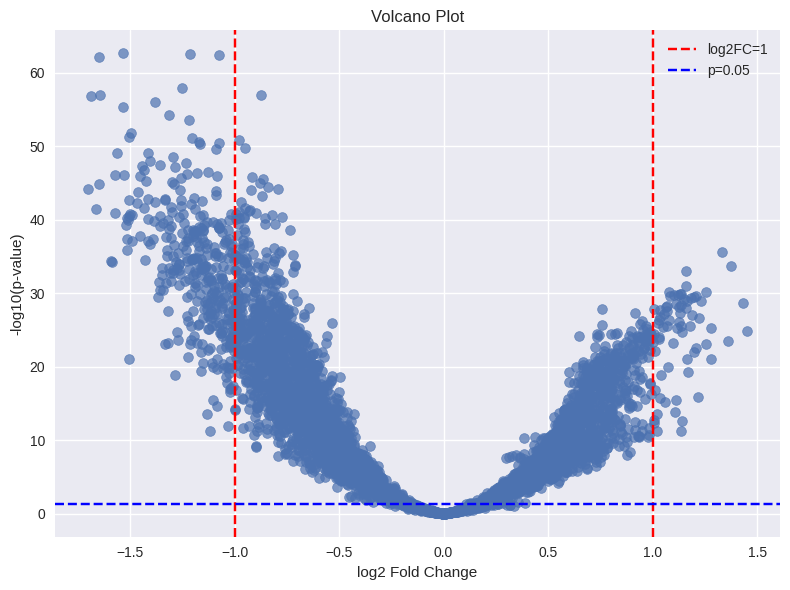

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate means and t-test for each gene
log2fc = tumor_expr.mean(axis=0) - normal_expr.mean(axis=0)
pvals = [ttest_ind(tumor_expr.iloc[:, i], normal_expr.iloc[:, i], equal_var=False).pvalue
         for i in range(tumor_expr.shape[1])]

results = pd.DataFrame({
    'gene': tumor_expr.columns,
    'log2FC': log2fc,
    'pvalue': pvals
})
results['-log10p'] = -np.log10(results['pvalue'])

# Volcano plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log2FC', y='-log10p', data=results, alpha=0.7, edgecolor=None)
plt.axvline(1, color='red', ls='--', label='log2FC=1')
plt.axvline(-1, color='red', ls='--')
plt.axhline(-np.log10(0.05), color='blue', ls='--', label='p=0.05')
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.legend()
plt.tight_layout()
plt.show()


Cleaned data shape: (156, 30)


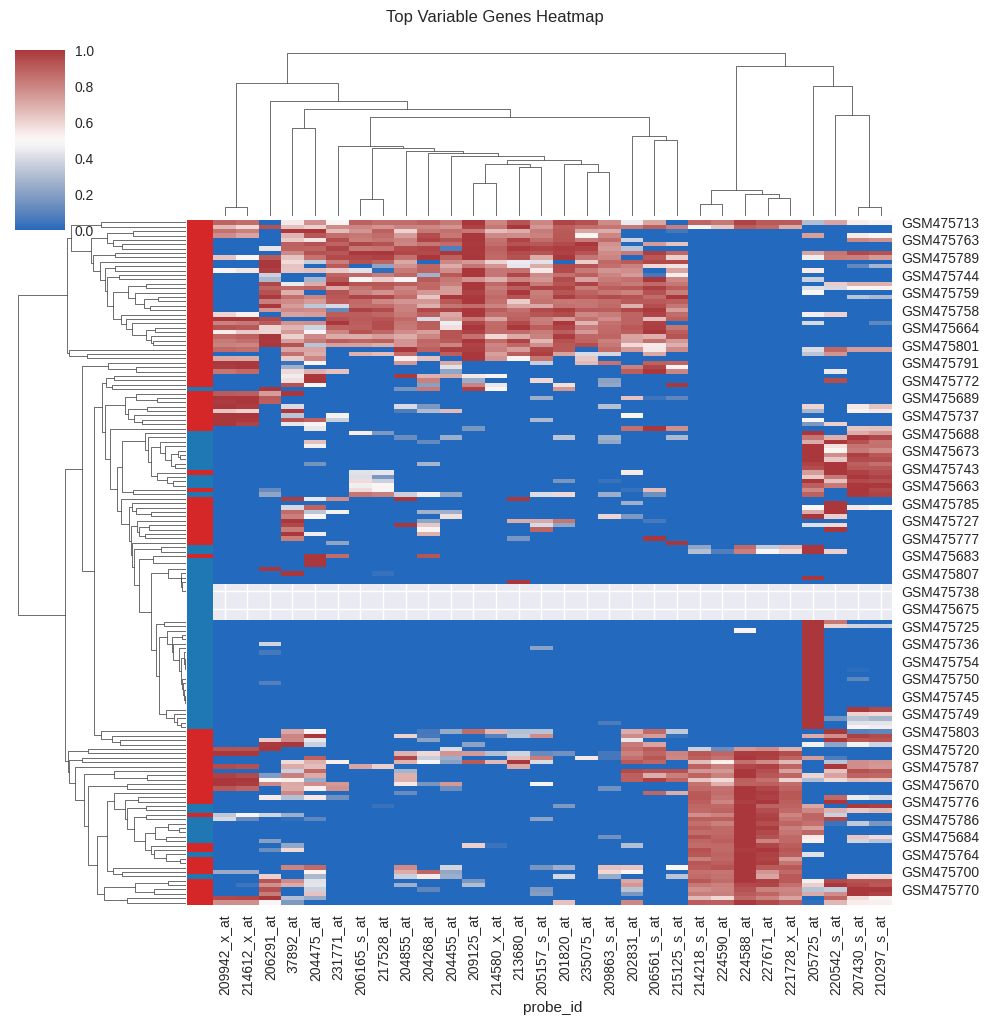

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace inf/-inf with NaN and drop any columns with NaN
plot_matrix_clean = plot_matrix.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='any')

# Drop zero-variance columns
stds = plot_matrix_clean.std(axis=0)
plot_matrix_clean = plot_matrix_clean.loc[:, stds > 0]

print("Cleaned data shape:", plot_matrix_clean.shape)

#  convert to float64 for numerical stability
plot_matrix_clean = plot_matrix_clean.astype(np.float64)

# Precompute linkage using Euclidean distance and average linkage
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# Compute distance matrices for rows (samples) and columns (genes)
dists_rows = ssd.pdist(plot_matrix_clean.values, metric='euclidean')
links_rows = sch.linkage(dists_rows, method='average')

dists_cols = ssd.pdist(plot_matrix_clean.T.values, metric='euclidean')
links_cols = sch.linkage(dists_cols, method='average')

# Make sure row_colors are aligned
if 'row_colors' in locals():
    row_colors_sub = row_colors.loc[plot_matrix_clean.index]
else:
    row_colors_sub = None

# Call clustermap with precomputed linkage
g = sns.clustermap(
    plot_matrix_clean,
    row_cluster=True,
    col_cluster=True,
    row_linkage=links_rows,
    col_linkage=links_cols,
    cmap='vlag',
    standard_scale=0,
    row_colors=row_colors_sub
)

g.fig.suptitle('Top Variable Genes Heatmap', y=1.02)
plt.show()


In [ ]:
#  DOWNLOAD AND PREPARE DATA (run this first)
!pip install GEOparse gseapy

import GEOparse
import pandas as pd
import numpy as np

# Download GSE19188
gse = GEOparse.get_GEO("GSE19188", destdir="./")

# Build expression matrix: probes x samples
expr_df = pd.DataFrame({
    gsm_name: gsm.table.set_index('ID_REF')['VALUE']
    for gsm_name, gsm in gse.gsms.items()
})
expr_df.index.name = 'probe_id'

# Build phenotype: samples x metadata
pheno = pd.DataFrame({
    gsm_name: {
        'title': gsm.metadata.get('title', [''])[0],
        'source': gsm.metadata.get('source_name_ch1', [''])[0],
        'characteristics': '; '.join(gsm.metadata.get('characteristics_ch1', []))
    }
    for gsm_name, gsm in gse.gsms.items()
}).T

print("expr_df shape:", expr_df.shape)
print("pheno shape:", pheno.shape)
print(pheno.head())


30-Nov-2025 16:01:34 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
30-Nov-2025 16:01:34 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19188/soft/GSE19188_family.soft.gz to ./GSE19188_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19188/soft/GSE19188_family.soft.gz to ./GSE19188_family.soft.gz
100%|██████████| 79.8M/79.8M [00:01<00:00, 42.2MB/s]
30-Nov-2025 16:01:37 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
30-Nov-2025 16:01:37 DEBUG downloader - Moving /tmp/tmp_3zgianq to /content/GSE19188_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmp_3zgianq to /content/GSE19188_family.soft.gz
30-Nov-2025 16:01:37 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19188/soft/GSE19188_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE19nnn/GSE19

expr_df shape: (54675, 156)
pheno shape: (156, 3)
                        title         source  \
GSM475656  NSCLC EMC TB0069tu  frozen tissue   
GSM475657     NSCLC EMC 2333N  frozen tissue   
GSM475658     NSCLC EMC 2335N  frozen tissue   
GSM475659     NSCLC EMC 2344T  frozen tissue   
GSM475660     NSCLC EMC 2381N  frozen tissue   

                                             characteristics  
GSM475656  tissue type: tumor; cell type: LCC; overall su...  
GSM475657  tissue type: healthy; cell type: healthy; over...  
GSM475658  tissue type: healthy; cell type: healthy; over...  
GSM475659  tissue type: healthy; cell type: healthy; over...  
GSM475660  tissue type: healthy; cell type: healthy; over...  


In [ ]:
#  ANALYSIS
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Preparing expression matrices
expr = expr_df
expr_var = expr.var(axis=1)
expr_filtered = expr.loc[expr_var > 1].T  # samples x genes
expr_filtered = expr_filtered.clip(lower=0)
expr_log = np.log2(expr_filtered + 1)

pheno = pheno.reindex(expr_log.index)
tumor_mask = pheno['characteristics'].str.contains('tissue type: tumor', case=False, na=False)
normal_mask = pheno['characteristics'].str.contains('tissue type: healthy', case=False, na=False)

tumor_expr = expr_log.loc[tumor_mask]
normal_expr = expr_log.loc[normal_mask]

print("Tumor:", tumor_expr.shape, "Normal:", normal_expr.shape)

# Differential expression
log2fc = tumor_expr.mean(axis=0) - normal_expr.mean(axis=0)
pvals = [ttest_ind(tumor_expr.iloc[:, i], normal_expr.iloc[:, i], equal_var=False).pvalue
         for i in range(tumor_expr.shape[1])]
results = pd.DataFrame({'gene': tumor_expr.columns, 'log2FC': log2fc, 'pvalue': pvals})
results['-log10p'] = -np.log10(results['pvalue'] + 1e-10)
results = results.sort_values('pvalue')

# TOP GENES
print("\n=== TOP 10 DE GENES ===")
print(results.head(10)[['gene', 'log2FC', 'pvalue']])
print("\n=== TOP 10 UPREGULATED ===")
print(results[results.log2FC > 0].head(10)[['gene', 'log2FC', 'pvalue']])
print("\n=== TOP 10 DOWNREGULATED ===")
print(results[results.log2FC < 0].head(10)[['gene', 'log2FC', 'pvalue']])




Tumor: (91, 4142) Normal: (65, 4142)

=== TOP 10 DE GENES ===
                    gene    log2FC        pvalue
probe_id                                        
232122_s_at  232122_s_at -1.533394  2.395809e-63
209267_s_at  209267_s_at -1.214225  3.054469e-63
203799_at      203799_at -1.075055  3.712509e-63
238222_at      238222_at -1.649590  7.148987e-63
205569_at      205569_at -1.251513  1.430637e-58
217757_at      217757_at -0.874817  1.151246e-57
213317_at      213317_at -1.641729  1.169330e-57
214135_at      214135_at -1.684735  1.651872e-57
229584_at      229584_at -1.381994  1.093179e-56
215454_x_at  215454_x_at -1.532183  4.797505e-56

=== TOP 10 UPREGULATED ===
                    gene    log2FC        pvalue
probe_id                                        
209875_s_at  209875_s_at  1.329558  2.349171e-36
201291_s_at  201291_s_at  1.376413  1.835891e-34
225681_at      225681_at  1.161571  8.641905e-34
214710_s_at  214710_s_at  1.160775  1.031012e-31
222608_s_at  222608_s_at  1.

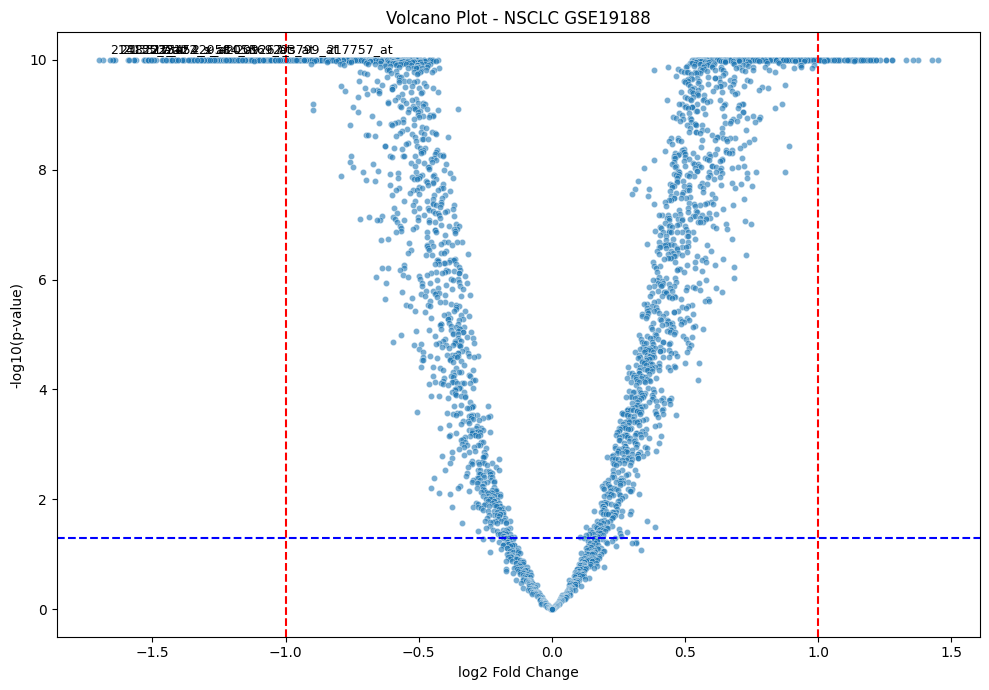

In [ ]:
# VOLCANO PLOT
plt.figure(figsize=(10,7))
sns.scatterplot(x='log2FC', y='-log10p', data=results, alpha=0.6, s=20)
plt.axvline(1, color='red', ls='--')
plt.axvline(-1, color='red', ls='--')
plt.axhline(-np.log10(0.05), color='blue', ls='--')
for _, row in results.head(10).iterrows():
    plt.annotate(row['gene'], (row['log2FC'], row['-log10p']), xytext=(5,5),
                textcoords='offset points', fontsize=9)
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot - NSCLC GSE19188')
plt.tight_layout()
plt.show()

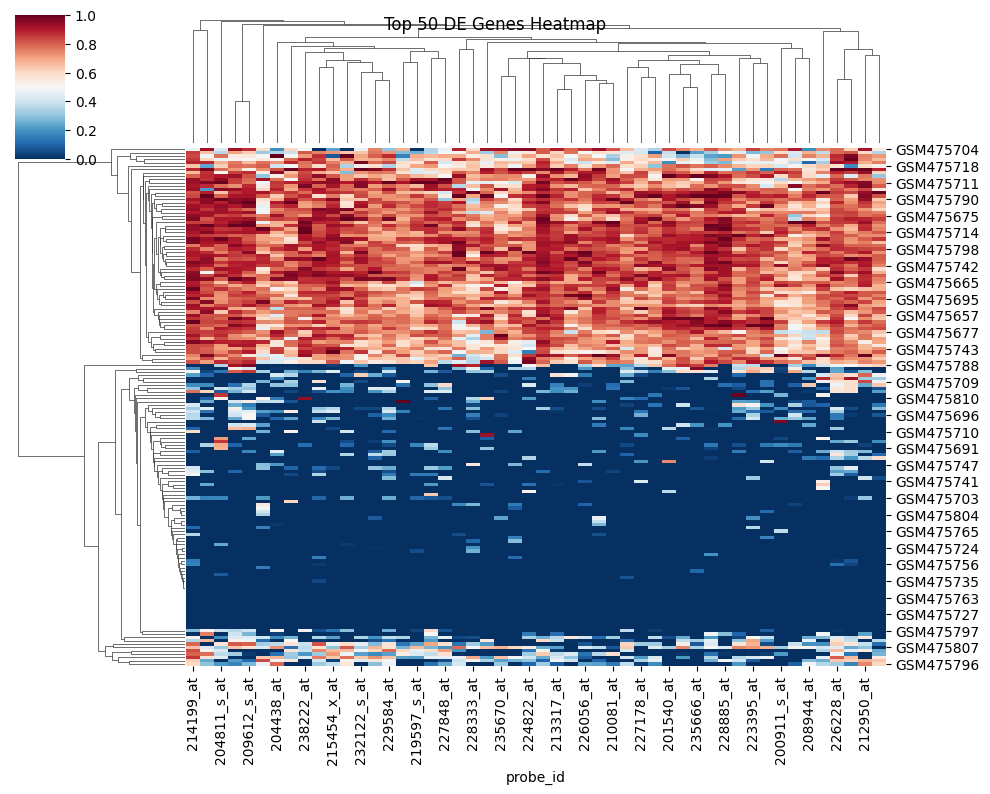

In [ ]:
# HEATMAP TOP OF 50 GENES
top50_genes = results.head(50)['gene']
heatmap_data = pd.concat([tumor_expr[top50_genes], normal_expr[top50_genes]])
sns.clustermap(heatmap_data, cmap='RdBu_r', standard_scale=1, figsize=(10,8))
plt.suptitle('Top 50 DE Genes Heatmap')
plt.show()

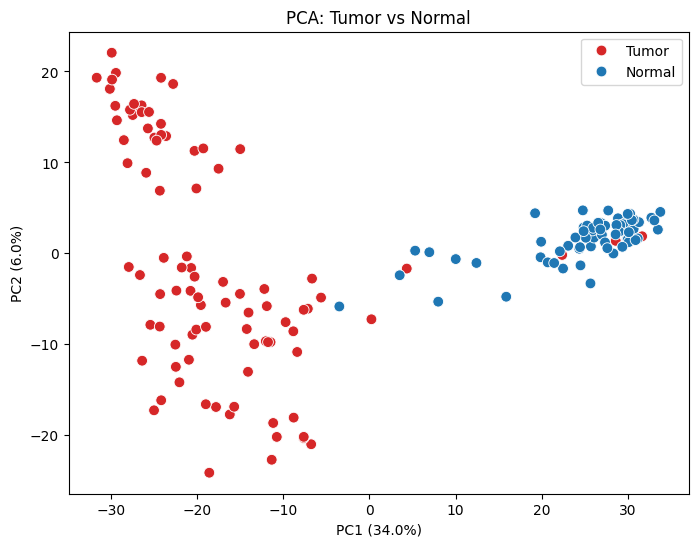

In [ ]:
# PCA
combined = pd.concat([tumor_expr, normal_expr])
groups = ['Tumor']*len(tumor_expr) + ['Normal']*len(normal_expr)
pca = PCA(n_components=2)
pcs = pca.fit_transform(combined.fillna(combined.mean()))
plt.figure(figsize=(8,6))
sns.scatterplot(x=pcs[:,0], y=pcs[:,1], hue=groups, palette=['#d62728','#1f77b4'], s=60)
plt.title('PCA: Tumor vs Normal')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.show()

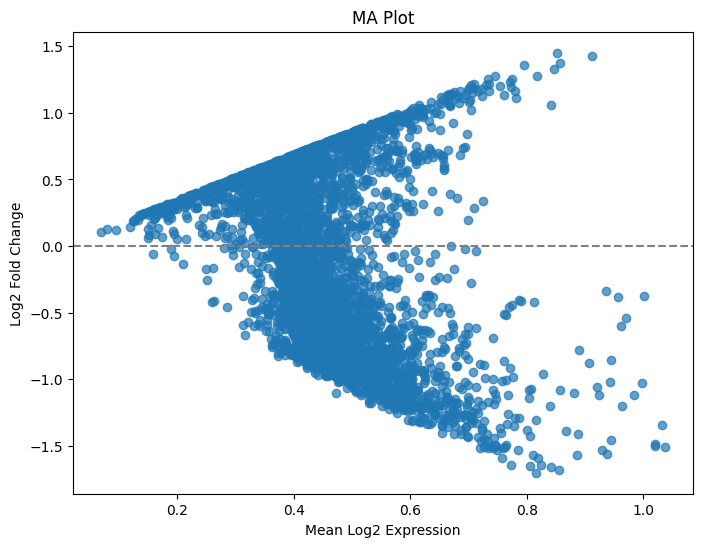

In [ ]:
#  MA PLOT
mean_expr = combined.mean(axis=0)
plt.figure(figsize=(8,6))
plt.scatter(mean_expr, results.set_index('gene').loc[mean_expr.index, 'log2FC'], alpha=0.7)
plt.axhline(0, color='gray', ls='--')
plt.xlabel('Mean Log2 Expression')
plt.ylabel('Log2 Fold Change')
plt.title('MA Plot')
plt.show()